# 데이터셋

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

    gender: 학생의 성별 (M: 남성, F: 여성)
    NationaliTy: 학생의 국적
    PlaceofBirth: 학생이 태어난 국가
    StageID: 학생이 다니는 학교 (초,중,고)
    GradeID: 학생이 속한 성적 등급
    SectionID: 학생이 속한 반 이름
    Topic: 수강한 과목
    Semester: 수강한 학기 (1학기/2학기)
    Relation: 주 보호자와 학생의 관계
    raisedhands: 학생이 수업 중 손을 든 횟수
    VisITedResources: 학생이 과목 공지를 확인한 횟수
    Discussion: 학생이 토론 그룹에 참여한 횟수
    ParentAnsweringSurvey: 부모가 학교 설문에 참여했는지 여부
    ParentschoolSatisfaction: 부모가 학교에 만족했는지 여부
    StudentAbscenceDays: 학생의 결석 횟수 (7회 이상/미만)
    Class: 학생의 성적 등급 (L: 낮음, M: 보통, H: 높음) 
        
    
    
- 데이터 출처: https://www.kaggle.com/aljarah/xAPI-Edu-Data

In [2]:
df = pd.read_csv('./data/xAPI-Edu-Data.csv')
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [4]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')

In [5]:
df['gender'].value_counts()

M    305
F    175
Name: gender, dtype: int64

In [7]:
df['NationalITy'].value_counts()

KW             179
Jordan         172
Palestine       28
Iraq            22
lebanon         17
Tunis           12
SaudiArabia     11
Egypt            9
Syria            7
Iran             6
USA              6
Lybia            6
Morocco          4
venzuela         1
Name: NationalITy, dtype: int64

### seaborn 활용하여 그래프 그리기

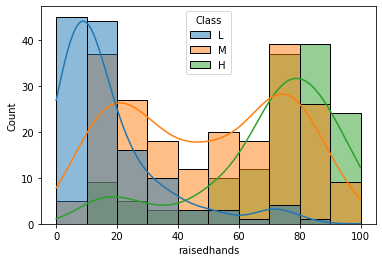

In [9]:
sns.histplot(data=df, x='raisedhands', hue='Class', hue_order=['L','M','H'], kde=True);

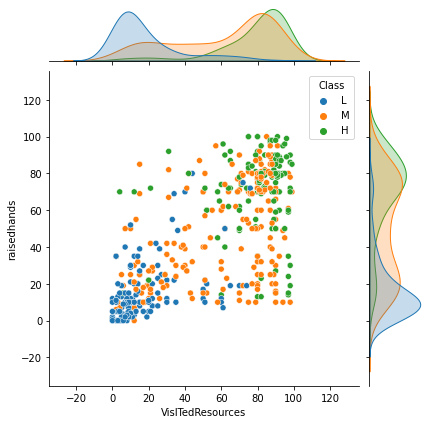

In [14]:
sns.jointplot(x='VisITedResources', y='raisedhands', data=df, hue='Class', hue_order=['L','M','H'])

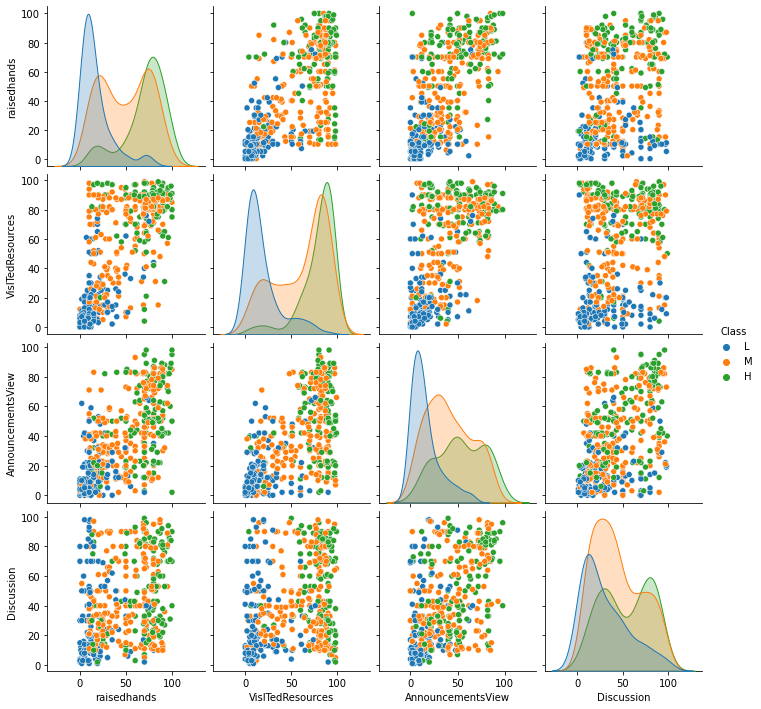

In [16]:
sns.pairplot(df, hue='Class', hue_order=['L','M','H']);

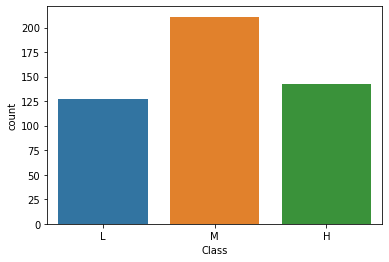

In [18]:
# Countplot
sns.countplot(x='Class', data=df, order=['L','M','H']);

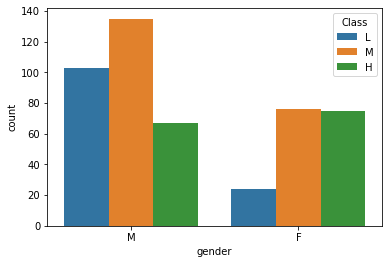

In [19]:
# Countplot
sns.countplot(x='gender', data=df, hue = 'Class', hue_order=['L','M','H']);

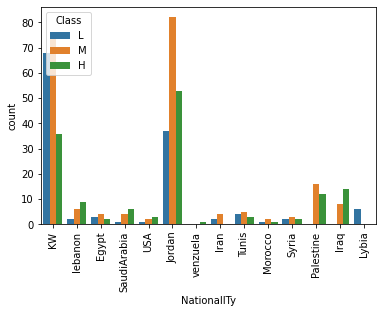

In [20]:
# Countplot
sns.countplot(x='NationalITy', data=df, hue = 'Class', hue_order=['L','M','H']);
plt.xticks(rotation=90)
plt.show()

### Class Column 수치로 바꾸기

In [21]:
# L, M, H를 숫자로 바꾸어 표현하기. Dataframe.map()

df['Class_value'] = df['Class'].map(dict(L=-1, M=0, H=1))
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class,Class_value
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M,0
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M,0
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L,-1
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L,-1
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M,0


<BarContainer object of 2 artists>

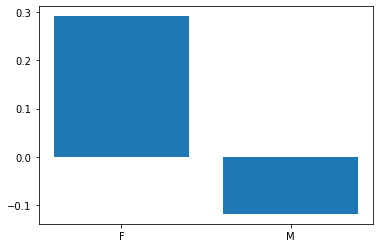

In [23]:
# 이를 시각화하기
gb = df.groupby('gender').mean()['Class_value']
plt.bar(gb.index, gb)

<BarContainer object of 12 artists>

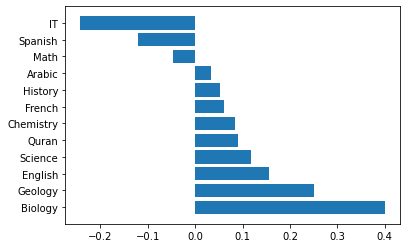

In [27]:
gb = df.groupby('Topic').mean()['Class_value'].sort_values(ascending=False)
plt.barh(gb.index, gb)

### 모델 학습을 위한 데이터 전처리

In [28]:
df.columns

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class', 'Class_value'],
      dtype='object')

In [38]:
# pd.get_dummies()를 이용해 범주형 데이터를 one-hot 벡터로 변환
# Multicollinearity 피하기 위해 drop_first를 True로 설정

X = pd.get_dummies(df.drop(['ParentschoolSatisfaction', 'Class', 'Class_value'], axis=1), columns=['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'ParentAnsweringSurvey','StudentAbsenceDays'], drop_first = True)
y = df['Class']

In [39]:
X.head()

,raisedhands,VisITedResources,AnnouncementsView,Discussion,gender_M,NationalITy_Iran,NationalITy_Iraq,NationalITy_Jordan,NationalITy_KW,NationalITy_Lybia,...,Topic_History,Topic_IT,Topic_Math,Topic_Quran,Topic_Science,Topic_Spanish,Semester_S,Relation_Mum,ParentAnsweringSurvey_Yes,StudentAbsenceDays_Under-7
0,15,16,2,20,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
1,20,20,3,25,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,1
2,10,7,0,30,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,30,25,5,35,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,40,50,12,50,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


### 학습데이터와 테스트데이터 분리하기

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### 모델 학습

### Logistic Regression 모델 생성/학습

In [41]:
from sklearn.linear_model import LogisticRegression

In [43]:
model_lr = LogisticRegression(max_iter = 10000)
model_lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

### 학습 결과 평가

In [44]:
from sklearn.metrics import classification_report
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           H       0.77      0.67      0.72        55
           L       0.78      0.76      0.77        33
           M       0.59      0.68      0.63        56

    accuracy                           0.69       144
   macro avg       0.72      0.70      0.71       144
weighted avg       0.70      0.69      0.70       144



- acc(정확도)는 0.69가 나온 것을 확인.

### LR 모델 계수로 상관성 파악

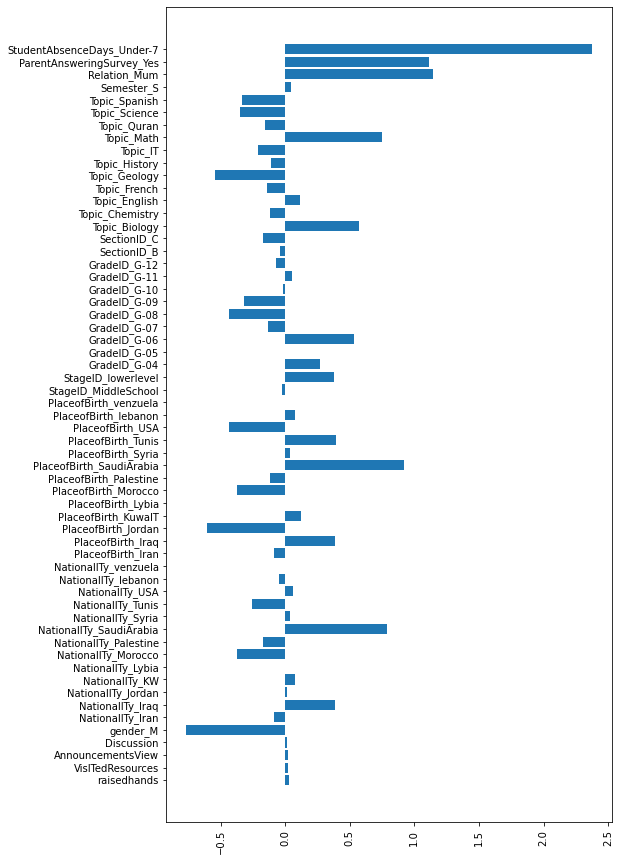

In [46]:
# Logistic Regression 모델의 coef_ 속성을 plot 하기
fig = plt.figure(figsize=(8, 15))
plt.barh(X.columns, model_lr.coef_[0,:])
plt.xticks(rotation=90)
plt.show()

In [50]:
model_lr.classes_

array(['H', 'L', 'M'], dtype=object)

- 성적이 High가 되게 하는 데에 가장 크게 영향을 주는 요소가 LR로 분석했을 때,
- Absence Day Under 7이 가장 큰 영향을 주었다.